## Assignment 3.1 *(7 points)* : Logistic Regression - Heart Disease dataset {-}

This assignment aims at familiarizing you with the use of Logistic Regression model supported by scikit-learn. You will have to do:

3.1.1.  **(3 points) Coding Tasks:** The following questions involve writing code to complete specific tasks.  
    3.1.1.1 *(1 point)* Analyze the dataset using libraries like Pandas and atplotlib.  
    3.1.1.2 *(0.5 point)* Preprocess the data to prepare for modeling.  
    3.1.1.3 *(0.5 point)* Divide the data into training and test sets with a suitable ratio (e.g., 80/20) to ensure unbiased model evaluation.  
    3.1.1.4 *(0.5 point)* Train a Logistic Regression model on the training set.    
    3.1.1.5 *(0.5 point)* Evaluate the model performance on the test set using the following metrics: precision, recall, f1 score, and print out the confusion matrix.  

3.1.2.  **(4 points) Open discussion questions:** These discussion questions ask you to analyze and argue your points.  Feel free to include relevant code examples to strengthen your arguments.  
    3.1.2.1 *(1 point)* Is there a relationship between age and the likelihood of heart disease in this dataset? Can you explore this for different age groups?  
    3.1.2.2 *(1 point)* How do vital signs like blood pressure and cholesterol levels compare between patients with and without heart disease?  
    3.1.2.3 *(1 point)* Does having high fasting blood sugar appear to be a risk factor for heart disease according to this dataset?
    3.1.2.4 *(1 point)* Considering all the features, what features do you think might be the most important in predicting heart disease based on this dataset?  

The dataset you will be working on is 'heart-disease.csv'. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, etc. This dataset is to predict, based on the given attributes of a patient, whether that particular person has a heart disease or not.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment3-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named DataViz-\<StudentID>-Assignment3 (e.g., DataViz-2012345-Assigment3) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how properly you split the data for training and testing purpose, then build a classification model, evaluate its performance and reasonably answer the open discussion questions.

Note that the evaluation will not consider the model accuracy as the highest priority, but how properly you handle the data and use scikit-learn to build the classifier.

### Deadline {-}
Please visit Canvas for details.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv('heart-disease.csv')

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


### Data features: {-}

* age: The person’s age in years
* sex: The person’s sex (1 = male, 0 = female)
* cp: chest pain type
  * Value 0: asymptomatic
  * Value 1: atypical angina
  * Value 2: non-anginal pain
  * Value 3: typical angina
* trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
* chol: The person’s cholesterol measurement in mg/dl (mg/dl: milligrams per decilitre)
* fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) (Fasting blood glucose: A test to determine how much glucose (sugar) is in a blood sample after an overnight without eating).
* restecg: resting electrocardiographic results
  * Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
  * Value 1: normal
  * Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* thalach: The person’s maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot)
* slope: the slope of the peak exercise ST segment
  * 0: downsloping
  * 1: flat
  * 2: upsloping
* ca: The number of major vessels (values in 0–3)
* thal: A blood disorder called thalassemia
  * Value 0: NULL (dropped from the dataset previously
  * Value 1: fixed defect (no blood flow in some part of the heart)
  * Value 2: normal blood flow
  * Value 3: reversible defect (a blood flow is observed but it is not normal)
  
### Data label: {-}

* target: Heart disease (1 = no, 0= yes)

# Solution

## 3.1.1. Coding tasks

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


None

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,54.007901,0.683973,1.005643,132.117381,247.497743,0.168172,0.495485,149.492099,0.310384,1.083296,1.424379,0.714447,2.278781,0.564334
std,9.126292,0.465186,1.024542,16.807511,47.209995,0.374230,0.526669,23.921327,0.462912,1.147935,0.556861,1.028825,0.572576,0.496124
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,245.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,206.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


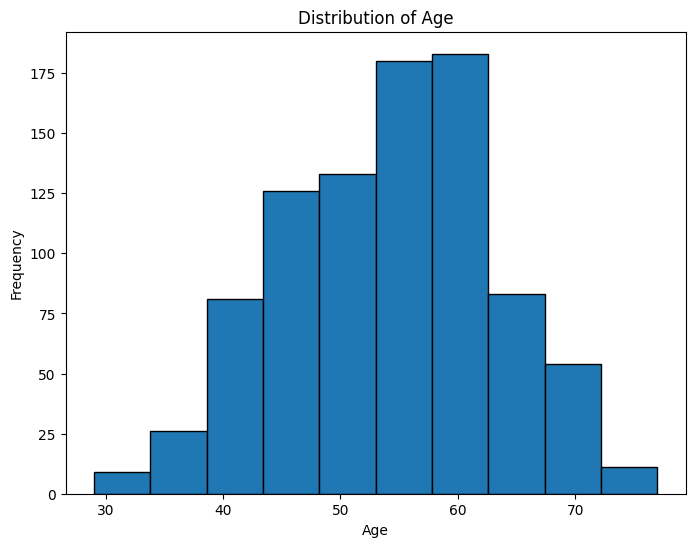

<Figure size 800x600 with 0 Axes>

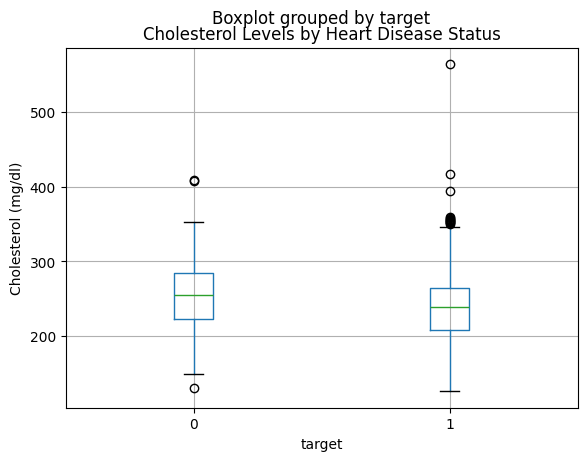

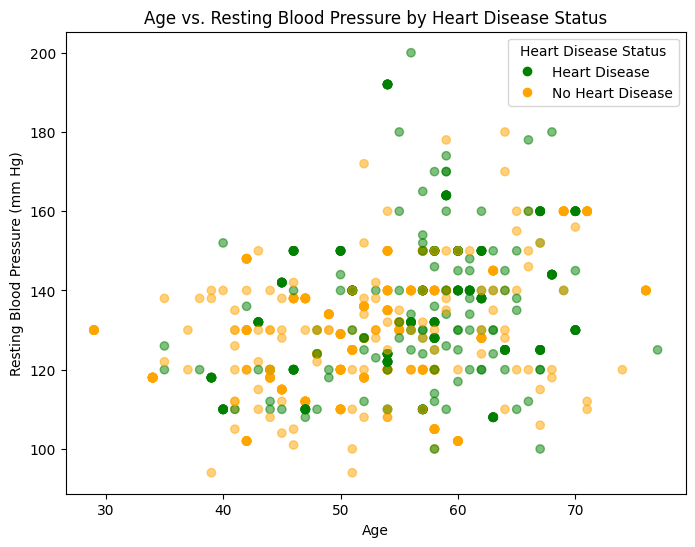

In [12]:
# 3.1.1.1 Analyze the dataset using libraries like Pandas and Matplotlib
display(df.info())
display(df.describe())
# Histogram of Age
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=10, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box Plot of Cholesterol by Heart Disease Status
plt.figure(figsize=(8, 6))
df.boxplot(column='chol', by='target')
plt.title('Cholesterol Levels by Heart Disease Status')
plt.ylabel('Cholesterol (mg/dl)')
plt.show()

# Scatter Plot of Age vs. Resting Blood Pressure
import matplotlib.pyplot as plt

color_map = {0: 'green', 1: 'orange'}  # Map 0 to green, 1 to orange

plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['age'], df['trestbps'], c=[color_map[i] for i in df['target']], alpha=0.5)
plt.title('Age vs. Resting Blood Pressure by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure (mm Hg)')

# Create custom legend entries
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Heart Disease', markerfacecolor='green', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='No Heart Disease', markerfacecolor='orange', markersize=8)
]

# Add legend to plot
plt.legend(handles=legend_elements, title="Heart Disease Status")

plt.show()

In [13]:
# 3.1.1.2 Preprocess the data for modeling
# For this example, I'll assume there are no missing values
# Remove duplicate rows (if any)
df.drop_duplicates(inplace=True)

In [14]:
# 3.1.1.3 Divide the data into training and test sets with a suitable ratio (e.g., 80/20) to ensure unbiased model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df.drop('target', axis=1)  # Features are all columns except 'target'
y = df['target']             # Target is the 'target' column

# Split data into training and test sets (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler AFTER splitting
scaler = StandardScaler()
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Fit and transform on the training set
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Only transform the test set using the training set's scaler
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Check data split
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (708, 13)
Test set size: (178, 13)


In [15]:
# 3.1.1.4 Train a Logistic Regression model on the training set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 3.1.1.4 Train a Logistic Regression model on the training set
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train, y_train)

# Print model coefficients and intercept
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.2f}")

print("\nModel Intercept:", model.intercept_[0])

Model Coefficients:
age: 0.01
sex: -1.89
cp: 1.48
trestbps: -0.54
chol: -0.01
fbs: 0.22
restecg: 0.27
thalach: 0.57
exang: -1.10
oldpeak: -1.38
slope: 0.96
ca: -1.23
thal: -1.52

Model Intercept: 3.0327406562895907


In [16]:
# 3.1.1.5 Evaluate the model performance on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9606741573033708
Precision: 0.9626168224299065
Recall: 0.9716981132075472
F1-score: 0.9671361502347418
Confusion Matrix:
 [[ 68   4]
 [  3 103]]


The model predicted quite well with 96.07% accuracy, 96.26% Precision, and 97.17% Recall

## 3.1.2. Open discussion questions

### 3.1.2.1
There is a neglectable correlation between age and heart disease in this dataset, because the Model coefficient value is only 0.01.

Since the mean age is 29, I will divide them into three groups of adult:
- Young adulthood (around 20-39)
- Middle adulthood (40-59)
- Old age (60+)

Looking into the result, we can see that for Young Adult and Middle Age, the older has the higher probability to suffer heart disease than younger (-0.31 and -0.08 respectively). For the Old age group, however, the older has lower probability (0.17) compared to younger.

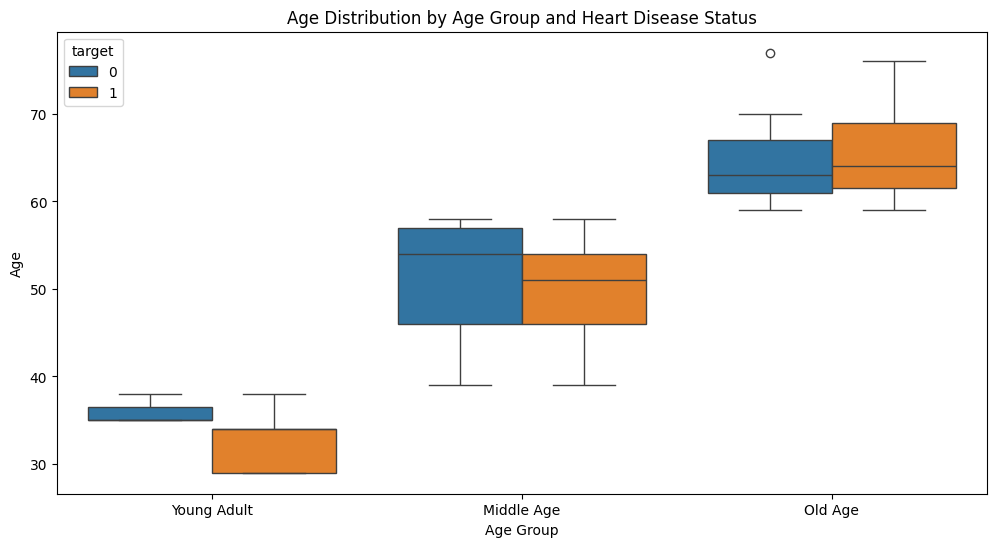

Correlation for Middle Age: -0.08
Correlation for Old Age: 0.17
Correlation for Young Adult: -0.31


In [17]:
# Create age group categories
df['age_group'] = pd.cut(df['age'], bins=[20, 39, 59, float('inf')],
                          labels=['Young Adult', 'Middle Age', 'Old Age'],
                          right=False)  # Include left edge, exclude right edge

# Create box plots for each age group and target value
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='age', hue='target', data=df)
plt.title('Age Distribution by Age Group and Heart Disease Status')
plt.xlabel('Age Group')
plt.ylabel('Age')
plt.show()

# Calculate correlation for each age group
for group in df['age_group'].unique():
    group_data = df[df['age_group'] == group]
    correlation = group_data['age'].corr(group_data['target'])
    print(f"Correlation for {group}: {correlation:.2f}")

### 3.1.2.2
For Resting Blood Pressure (trestbps):
According to regression data, people having higher blood pressure are more likely to suffer heart disease than lower (-0.54). On the other hands, patients with heart disease have a higher average resting BP (≈135.84 mm Hg) compared to those without heart disease (≈129.24 mm Hg).

For Cholesterol (chol):
According to regression data, however, people having higher cholesterol do not mean that they will more likely to suffer heart disease than lower (-0.01). Nevertheless, patients with heart disease have higher cholesterol levels on average (≈252.50 mg/dl) than those without (≈243.63 mg/dl).

This suggests that elevated blood pressure and cholesterol may be associated with a higher risk of heart disease, but the correlation might not be clear, particularly with cholesterol. It might be because of the confounding effects between variables.

In [18]:
# Calculate the mean of blood pressure and cholesterol for people with and without heart disease
blood_pressure_with_disease = df[df['target'] == 0]['trestbps'].mean()
blood_pressure_without_disease = df[df['target'] == 1]['trestbps'].mean()
cholesterol_with_disease = df[df['target'] == 0]['chol'].mean()
cholesterol_without_disease = df[df['target'] == 1]['chol'].mean()

print(f"Mean blood pressure with heart disease: {blood_pressure_with_disease:.2f}")
print(f"Mean blood pressure without heart disease: {blood_pressure_without_disease:.2f}")
print(f"Mean cholesterol with heart disease: {cholesterol_with_disease:.2f}")
print(f"Mean cholesterol without heart disease: {cholesterol_without_disease:.2f}")


Mean blood pressure with heart disease: 135.84
Mean blood pressure without heart disease: 129.24
Mean cholesterol with heart disease: 252.50
Mean cholesterol without heart disease: 243.63


### 3.1.2.3
- According to the correlation, there is 0.22 correlation between fasting blood sugar and heart disease, meaning that higher fasting blood sugar is associated with lower heart disease probability.
- Among patients with heart disease, 16.06% had high fasting blood sugar (fbs = 1).
- Among those without heart disease, 17.4% had high fasting blood sugar.

Since the proportion of high fbs is slightly higher in people without heart disease and the positive probability, high fasting blood sugar does not appear to be a strong risk factor in this dataset, BUT it also does not mean that higher fasting blood sugar could reduce heart disease chance.

In [19]:
# 3.1.2.3
# Calculate percentage of patients with high fbs in each target group
heart_disease_fbs_percentage = df[df['target'] == 0]['fbs'].mean() * 100
no_heart_disease_fbs_percentage = df[df['target'] == 1]['fbs'].mean() * 100

# Print the results
print(f"Percentage of patients with heart disease and high fbs: {heart_disease_fbs_percentage:.2f}%")
print(f"Percentage of patients without heart disease and high fbs: {no_heart_disease_fbs_percentage:.2f}%")

Percentage of patients with heart disease and high fbs: 16.06%
Percentage of patients without heart disease and high fbs: 17.40%


### 3.1.2.4
Based on the logistic regression coefficients (magnitude indicates importance):

- Most influential positive predictors (higher values increase chance of no heart disease):
  + cp (chest pain type): +1.48
  + thalach (max heart rate): +0.58
  + slope (ST segment slope): +0.96

- Most influential negative predictors (higher values increase chance of heart disease):
  + sex (male): -1.89
  + oldpeak (ST depression): -1.37
  + thal (thalassemia): -1.52
  + ca (number of vessels): -1.23
  + exang (exercise-induced angina): -1.10

So, the most important features appear to be: Sex, Chest pain type, Oldpeak, Thal, Number of vessels, and Exercise-induced angina.

In [20]:
# Your argument goes here
# 3.1.2.4

## Assignment 3.2 *(3 points)*: Logistic Regression - CIFAR 10 SMALL dataset

This example demonstrates how to build a logistic regression model to recognize objects in CIFAR 10 dataset.

In this assignment, you will have to:
- 3.2.1 (Done) Load the dataset.
- 3.2.2 *(1 point)* Preprocess and normalize the images.
- 3.2.3 *(1 point)* Construct, train, and evaluate a multinomial logistic regression model for CIFAR 10 SMALL image classification.
- 3.2.4 *(1 point)* Assess the model’s performance on the test set. Keep in mind that low accuracy is acceptable due to the complexity of the data and the limited capacity of logistic regression.

The dataset you will be working on is CIFAR 10 SMALL (https://www.openml.org/d/40926) which consists of 20,000 32x32 colour images in 10 classes, with 2,000 images per class. There are 14,000 training images and 6,000 test images. Here follows the ten object classes:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Here follows some data samples in the dataset:

![alt text](https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png)

In [30]:
# Import necessary libraries
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [31]:
# Load the CIFAR 10 SMALL dataset from openml
# OpenML is an open platform for sharing datasets, algorithms, and experiments
cifar_10_small = fetch_openml('cifar_10_small', version=1, parser='auto')

In [32]:
# Separate data into features X and labels y, then convert to numpy arrays
X = cifar_10_small['data'].to_numpy()
y = cifar_10_small['target'].to_numpy()

print("Feature shape: " + str(X.shape))
print("Label shape: " + str(y.shape))

class_names = [
    'airplane',   # Label: 0
    'automobile', # Label: 1
    'bird',       # Label: 2
    'cat',        # Label: 3
    'deer',       # Label: 4
    'dog',        # Label: 5
    'frog',       # Label: 6
    'horse',      # Label: 7
    'ship',       # Label: 8
    'truck'       # Label: 9
]

print(X)

Feature shape: (20000, 3072)
Label shape: (20000,)
[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [ 20  19  15 ...  50  53  47]
 [ 25  15  23 ...  80  81  80]
 [ 73  98  99 ...  94  58  26]]


Label: dog


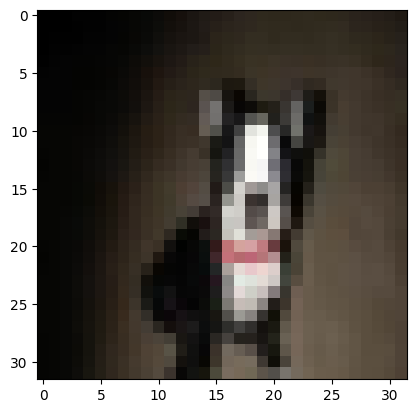

In [33]:
# Print a sample of the dataset
print("Label: " + class_names[int(y[198])])
plt.imshow(X[198].reshape(3,32,32).transpose([1,2,0])) # The nature of the data requires this restructuring.

Label: automobile


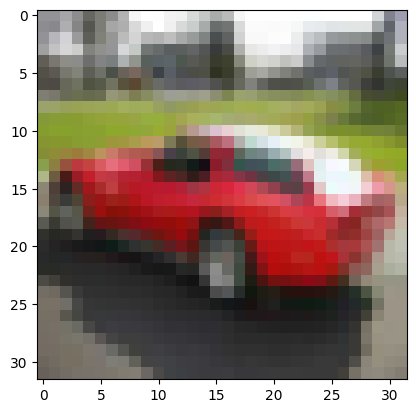

In [34]:
# Print a sample of the dataset
print("Label: " + class_names[int(y[255])])
plt.imshow(X[255].reshape(3,32,32).transpose([1,2,0])) # The nature of the data requires this restructure.

In [35]:
# Split the dataset into training and testing sets (using 70% for training and 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [36]:
# 3.2.2 Preprocess and normalize the images
# Normalize pixel values to the range [0, 1]
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Reshape the images to a 2D array for logistic regression
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Check the result
print(X_train)

[[0.28235295 0.29803923 0.3019608  ... 0.16470589 0.5254902  0.67058825]
 [0.94509804 0.9137255  0.9137255  ... 0.7764706  0.77254903 0.79607844]
 [0.3529412  0.34117648 0.32941177 ... 0.21176471 0.19215687 0.22352941]
 ...
 [1.         0.99607843 0.99607843 ... 0.33333334 0.34901962 0.36862746]
 [0.18431373 0.18039216 0.15294118 ... 0.10980392 0.10196079 0.12941177]
 [0.10588235 0.08235294 0.07450981 ... 0.78039217 0.8117647  0.81960785]]


In [37]:
# 3.2.3 Construct, train, and evaluate a multinomial logistic regression model
# Initialize the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Print model coefficients:
print("Model Coefficients:")
# Since X is a numpy array and doesn't have columns, we use a range to represent the features
for feature_index, coef in enumerate(model.coef_[0]):
    print(f"Feature {feature_index}: {coef:.2f}")

# Print odds ratios:
print("Odds Ratios:")
# Since X is a numpy array and doesn't have columns, we use a range to represent the features
for feature_index, coef in enumerate(model.coef_[0]):
    odds_ratio = np.exp(coef)
    print(f"Feature {feature_index}: {odds_ratio:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Coefficients:
Feature 0: 0.09
Feature 1: -0.18
Feature 2: -0.29
Feature 3: -0.17
Feature 4: 0.20
Feature 5: 0.08
Feature 6: -0.40
Feature 7: -0.28
Feature 8: 0.08
Feature 9: -0.14
Feature 10: -0.08
Feature 11: 0.01
Feature 12: -0.16
Feature 13: 0.23
Feature 14: -0.03
Feature 15: 0.10
Feature 16: 0.03
Feature 17: 0.14
Feature 18: -0.02
Feature 19: -0.20
Feature 20: -0.16
Feature 21: 0.13
Feature 22: 0.03
Feature 23: -0.13
Feature 24: -0.44
Feature 25: -0.30
Feature 26: 0.15
Feature 27: 0.07
Feature 28: 0.23
Feature 29: 0.22
Feature 30: 0.35
Feature 31: -0.19
Feature 32: -0.01
Feature 33: 0.26
Feature 34: 0.23
Feature 35: 0.15
Feature 36: 0.37
Feature 37: 0.07
Feature 38: -0.07
Feature 39: -0.09
Feature 40: 0.12
Feature 41: 0.11
Feature 42: 0.03
Feature 43: 0.11
Feature 44: 0.16
Feature 45: 0.04
Feature 46: 0.16
Feature 47: 0.36
Feature 48: 0.26
Feature 49: 0.36
Feature 50: 0.05
Feature 51: 0.08
Feature 52: -0.23
Feature 53: -0.02
Feature 54: 0.04
Feature 55: -0.43
Feature 56: -0.4

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
# 3.2.4 Assess the model's performance
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for multi-class
recall = recall_score(y_test, y_pred, average='weighted')      # Weighted for multi-class
f1 = f1_score(y_test, y_pred, average='weighted')            # Weighted for multi-class
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:\n", conf_matrix)

Test Accuracy: 0.3455
Precision: 0.3445884639882767
Recall: 0.3455
F1-score: 0.34430201531420773
Confusion Matrix:
 [[270  26  38  24  13  29  15  31  87  39]
 [ 37 195  26  37  22  31  27  42  58 105]
 [ 69  30 142  57  74  59  70  53  34  18]
 [ 34  26  74 130  61 115  80  39  31  31]
 [ 28  15  84  58 184  66  93  77  17  16]
 [ 18  25  59  80  58 159  43  50  30  12]
 [ 13  24  70 106  73  54 231  32  12  12]
 [ 31  30  51  38  57  55  39 240  37  36]
 [100  47  22  23  14  34   9  14 285  50]
 [ 51 102  20  24  21  22  33  33  67 237]]


The data shown a very low values of both precision and recall made the model's trustworthiness quite low.